In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    return (1.0 / (2.0 * len(y))) * sum((y - tx.dot(w))**2)

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.lstsq(tx, y, rcond=None)[0]
    return compute_loss(y, tx, w), w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    return least_squares(y, tx)

Test it here

In [5]:
test_your_least_squares()

(15.385887868829453, array([73.293922  , 13.47971243]))

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
print(x)
print(y)

shape of x (50,)
shape of y (50,)
[0.35237491 4.8951233  1.86662437 3.50706129 3.38087384 0.73093728
 3.88562366 5.65224803 6.28318531 2.37137419 0.60474982 3.63324875
 0.85712473 2.49756165 1.61424946 5.39987312 6.15699785 6.0308104
 0.47856237 2.87612401 4.51656093 0.98331219 1.10949964 0.1
 2.11899928 1.36187455 4.01181111 5.77843549 4.26418602 1.2356871
 2.24518674 1.99281183 1.48806201 4.64274839 4.39037348 3.00231147
 0.22618746 5.27368567 5.02131076 5.52606058 2.6237491  4.76893584
 3.12849893 1.74043692 3.7594362  3.25468638 5.90462294 4.13799857
 2.74993656 5.14749821]
[ 8.95549970e-02 -1.28027608e+00  1.28930361e+00 -2.68157012e-01
 -2.06807030e-01  5.38669461e-01 -4.84226326e-01 -1.05814170e+00
  2.22695473e-01  1.94693837e-01  4.37144573e-01 -3.01041920e-01
  4.25144932e-01  3.76102400e-02  8.33364051e-01 -4.37345163e-01
 -1.41108000e-04 -3.08575746e-01  7.22554859e-01 -3.72595292e-01
 -7.37222919e-01  9.51211821e-01  6.05998553e-01  3.59152612e-01
  7.77071848e-01  3.88647

In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = []
    for x_i in x:
        poly.append(np.power(np.repeat(x_i, degree + 1), range(degree + 1)))
    return np.array(poly)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [22]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 20]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly = build_poly(x, degree)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        loss, weights = least_squares(y, poly)
        rmse = np.sqrt(2 * loss)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737517
Processing 3th experiment, degree=7, rmse=0.2496587036090744
Processing 4th experiment, degree=20, rmse=0.4447110870903956


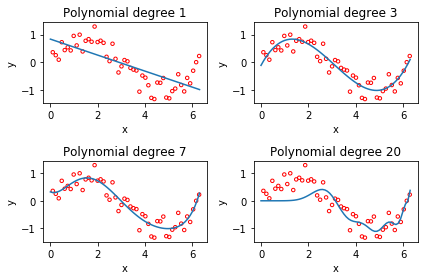

In [23]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    data_size = x.shape[0]
    training_indices = np.random.choice(data_size, int(data_size * ratio), replace=False)
    test_indices = np.delete(np.array(range(data_size)), training_indices) 
    return x[training_indices], y[training_indices], x[test_indices], y[test_indices]

Then, test your `split_data` function below.

In [11]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x, train_y, test_x, test_y = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx, test_tx = build_poly(train_x, degree), build_poly(test_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    train_mse, train_w = least_squares(train_y, train_tx)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    test_mse = compute_loss(test_y, test_tx, train_w)
    rmse_tr, rmse_te = np.sqrt(2*train_mse), np.sqrt(2*test_mse)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [12]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
    print()

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250

proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.065

proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.202
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=10.218



# 3 Ridge Regression
Please fill in the function below.

In [13]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    A = tx.T.dot(tx)
    I = np.identity(A.shape[0])
    w = np.linalg.solve(A + lambda_ * 2 * len(y) * I, tx.T.dot(y))
    return compute_loss(y, tx, w), w

In [14]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_tr = build_poly(x_tr, degree)
    poly_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        loss_tr, w_tr = ridge_regression(y_tr, poly_tr, lambda_)
        loss_te = compute_loss(y_te, x_te, w_tr)
        rmse_tr.append(np.sqrt(2 * loss_tr))
        rmse_te.append(np.sqrt(2 * loss_te))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


In [15]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

ValueError: shapes (25,) and (8,) not aligned: 25 (dim 0) != 8 (dim 0)